# <p style='text-align: center; '>FAKE NEWS DETECTION</p>

* The objective of this project is to develop a model that can accurately identify and differentiate between genuine and fabricated news articles. we will do some machine learning models to perform the classification task (fake or not).
* The dataset for this project is obtained from kaggle,There are two files one for real news and one for fake news with a total of 23481 "fake" articles and 21417 "real" articles.

## Importing libraries
We first import all essential Python packages which are used for titanic survival prediction.

In [76]:
#Importing All Required Libaries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

## Read datasets
The dataset we are going to use is from a CSV file named "fake.csv" and "true.csv". The dataset contains all the necessary information about the news articles that will be used for training and evaluating machine learning models to distinguish between fake and genuine news articles.

In [78]:
# Display shape of 'fake and true' datasets
fake.shape,true.shape

((23481, 4), (21417, 4))

In [79]:
# display first few rows of 'fake' dataset.
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [80]:
# display first few rows of 'true' dataset.
true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


## Data cleaning and preparation
Data cleaning and preparation involve tasks such as removing punctuation, converting text to lowercase, eliminating stopwords, and structuring the dataset for analysis, enhancing the quality and relevance of textual information for subsequent modeling.

In [81]:
# Add flag to track fake and real
fake['target'] = 'fake'
true['target'] = 'true'

In [82]:
# Concatenate dataframes
data = pd.concat([fake, true]).reset_index(drop = True)
data.shape

(44898, 5)

In [83]:
# Shuffle the data
from sklearn.utils import shuffle
data = shuffle(data)
data = data.reset_index(drop=True)

In [84]:
# check
data.head()

,title,text,subject,date,target
0,"Comey testimony disturbing, Trump appears to t...",WASHINGTON (Reuters) - The top Democrat on the...,politicsNews,"June 8, 2017",true
1,Former U.S. Homeland Security officials back n...,WASHINGTON (Reuters) - A bipartisan group of d...,politicsNews,"November 7, 2017",true
2,BOOM! SMALL ALABAMA TOWN TAKES ON TARGET: Any ...,America is experiencing an overwhelming climat...,left-news,"Apr 28, 2016",fake
3,The Secret Society That Ruined the World: Rhod...,IMAGE: Globalist scribe for the American branc...,US_News,"September 20, 2017",fake
4,STUPID Trump Fans Think He Won The Popular Vo...,As we unfortunately learned during the preside...,News,"November 12, 2016",fake


In [85]:
# Removing the date 
data.drop(["date"],axis=1,inplace=True)
# check
data.head()

,title,text,subject,target
0,"Comey testimony disturbing, Trump appears to t...",WASHINGTON (Reuters) - The top Democrat on the...,politicsNews,true
1,Former U.S. Homeland Security officials back n...,WASHINGTON (Reuters) - A bipartisan group of d...,politicsNews,true
2,BOOM! SMALL ALABAMA TOWN TAKES ON TARGET: Any ...,America is experiencing an overwhelming climat...,left-news,fake
3,The Secret Society That Ruined the World: Rhod...,IMAGE: Globalist scribe for the American branc...,US_News,fake
4,STUPID Trump Fans Think He Won The Popular Vo...,As we unfortunately learned during the preside...,News,fake


In [86]:
# Removing the title (we will only use the text)
data.drop(["title"],axis=1,inplace=True)
# check
data.head()

,text,subject,target
0,WASHINGTON (Reuters) - The top Democrat on the...,politicsNews,true
1,WASHINGTON (Reuters) - A bipartisan group of d...,politicsNews,true
2,America is experiencing an overwhelming climat...,left-news,fake
3,IMAGE: Globalist scribe for the American branc...,US_News,fake
4,As we unfortunately learned during the preside...,News,fake


In [87]:
# Converting to lowercase
data['text'] = data['text'].apply(lambda x: x.lower())
data.head()

,text,subject,target
0,washington (reuters) - the top democrat on the...,politicsNews,true
1,washington (reuters) - a bipartisan group of d...,politicsNews,true
2,america is experiencing an overwhelming climat...,left-news,fake
3,image: globalist scribe for the american branc...,US_News,fake
4,as we unfortunately learned during the preside...,News,fake


In [88]:
# Removing punctuation
import string
def punctuation_removal(text):
    all_list = [char for char in text if char not in string.punctuation]
    clean_str = ''.join(all_list)
    return clean_str

data['text'] = data['text'].apply(punctuation_removal)
# check
data.head()

,text,subject,target
0,washington reuters the top democrat on the se...,politicsNews,true
1,washington reuters a bipartisan group of doze...,politicsNews,true
2,america is experiencing an overwhelming climat...,left-news,fake
3,image globalist scribe for the american branch...,US_News,fake
4,as we unfortunately learned during the preside...,News,fake


In [89]:
# Removing stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')
data['text'] = data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

# check
data.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Pulkit\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,text,subject,target
0,washington reuters top democrat senate intelli...,politicsNews,true
1,washington reuters bipartisan group dozens for...,politicsNews,true
2,america experiencing overwhelming climate host...,left-news,fake
3,image globalist scribe american branch interna...,US_News,fake
4,unfortunately learned presidential campaign do...,News,fake


## Basic data exploration
Now we use data exploration which is used to take a look at the dataset for its better understanding.

In [90]:
# Checking for Null values in 'fake' dataset.
fake.isnull().sum()

title      0
text       0
subject    0
date       0
target     0
dtype: int64

In [91]:
# Checking for Null values in 'true' dataset.
true.isnull().sum()

title      0
text       0
subject    0
date       0
target     0
dtype: int64

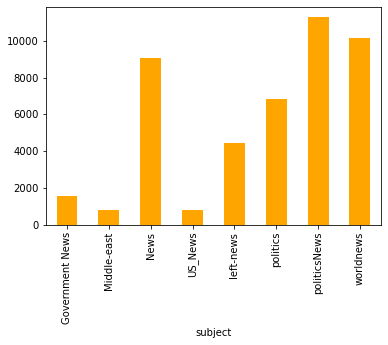

In [92]:
# How many articles per subject?
subject_counts = data.groupby(['subject'])['text'].count()
# Plot the data using a bar plot 
subject_counts.plot(kind="bar", color='orange')
plt.show()

target
fake    23481
true    21417
Name: text, dtype: int64


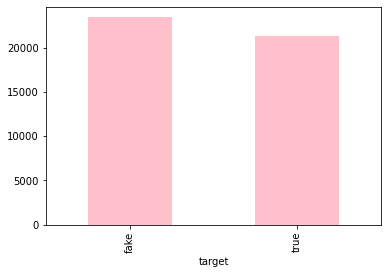

In [93]:
# How many fake and real articles?
print(data.groupby(['target'])['text'].count())
# Group and count the 'text' column by 'target'
target_counts = data.groupby(['target'])['text'].count()
# Plot the data using a bar plot 
target_counts.plot(kind="bar", color='pink') 
plt.show()

In [94]:
# Most frequent words counter    
from nltk import tokenize
token_space = tokenize.WhitespaceTokenizer()

def counter(text, column_text, quantity):
    all_words = ' '.join([text for text in text[column_text]])
    token_phrase = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                   "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = 'brown')
    ax.set(ylabel = "Count")
    plt.xticks(rotation='vertical')
    plt.show()

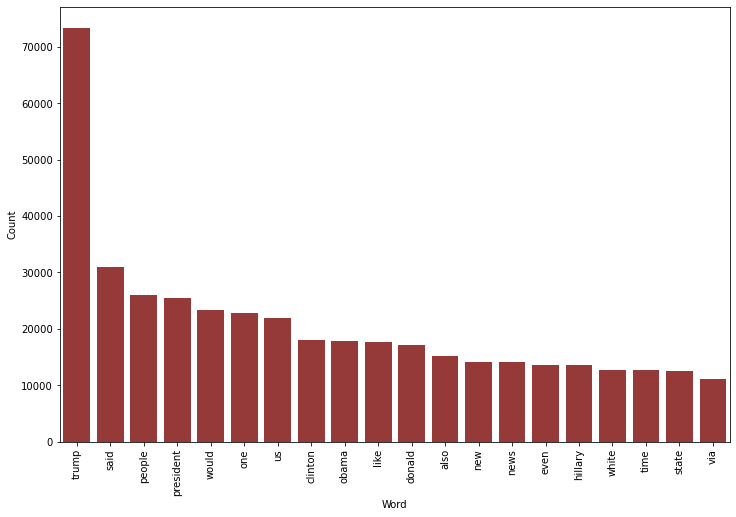

In [95]:
# Most frequent words in fake news
counter(data[data["target"] == "fake"], "text", 20)

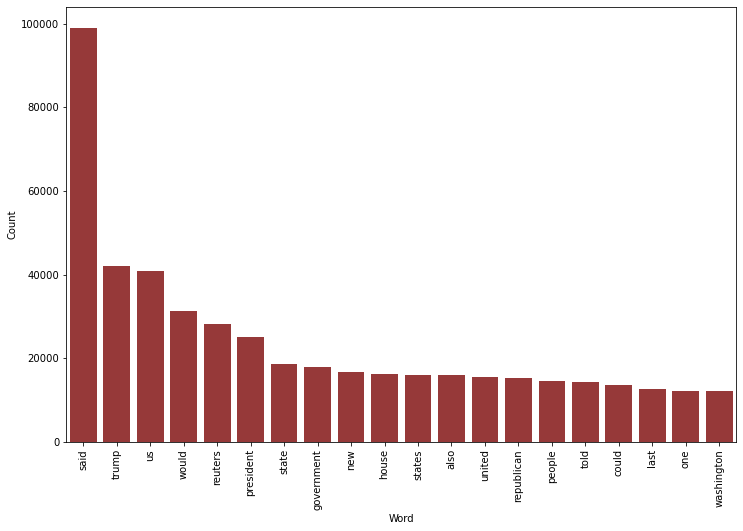

In [96]:
# Most frequent words in real news
counter(data[data["target"] == "true"], "text", 20)

## Modeling
In modeling we create and train algorithms to differentiate between fabricated and authentic news articles.

In [97]:
# Function to plot the confusion matrix 
from sklearn import metrics
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## Data preparation
Now we split the dataset into testing and training sets

In [98]:
# Split the data
X_train,X_test,y_train,y_test = train_test_split(data['text'], data.target, test_size=0.2, random_state=42)

### Logistic regression

In [99]:
# Vectorizing and applying TF-IDF
from sklearn.linear_model import LogisticRegression

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', LogisticRegression())])

# Fitting the model
model = pipe.fit(X_train, y_train)

# Accuracy
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 98.98%


Confusion matrix, without normalization


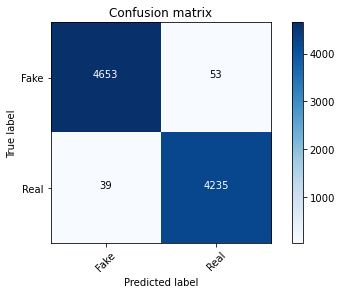

In [100]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

### Decision Tree Classifier

In [101]:
from sklearn.tree import DecisionTreeClassifier

# Vectorizing and applying TF-IDF
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', DecisionTreeClassifier(criterion= 'entropy',
                                           max_depth = 20, 
                                           splitter='best', 
                                           random_state=42))])
# Fitting the model
model = pipe.fit(X_train, y_train)

# Accuracy
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 99.64%


Confusion matrix, without normalization


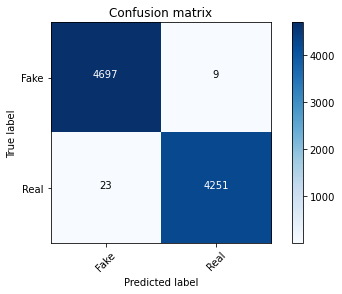

In [102]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])